In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")


'''
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
'''

'\ndatetime - hourly date + timestamp  \nseason -  1 = spring, 2 = summer, 3 = fall, 4 = winter \nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

# Exploratory Data Analysis - EDA

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
print("Holiday: ",  df['holiday'].sum())
print("Workingday: ",  df['workingday'].sum())

Holiday:  311
Workingday:  7412


In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

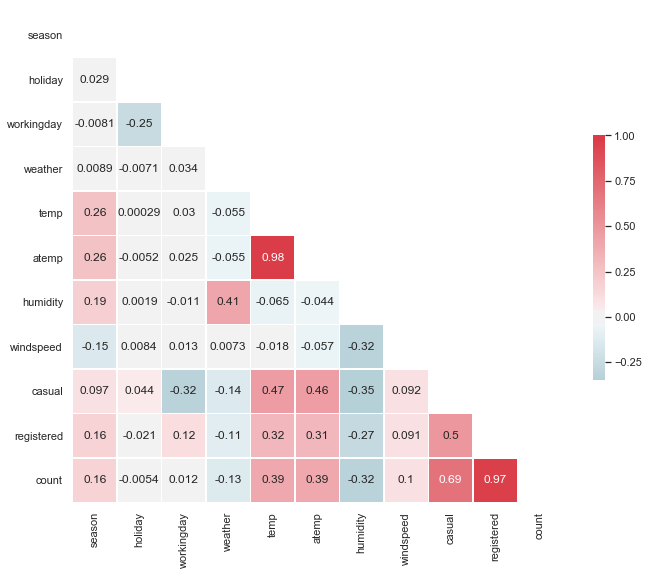

In [7]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [8]:
# count is what we want to know the exact corrolations for
#humidity + working day/holiday/weather seems to have little impact on count
# casual + registered users = count
# temp and season have an interesting impact on count
# more registered users on working days
# more casual users on holidays

In [9]:
def SplitDateTime(df):
    df['date'] = df['datetime'].apply(lambda x: x.split()[0])
    df['hour'] = df['datetime'].apply(lambda x: x.split()[1]).apply(lambda x: x.split(':')[0])
    df.drop(columns='datetime', inplace=True)
    return

In [10]:
SplitDateTime(df)

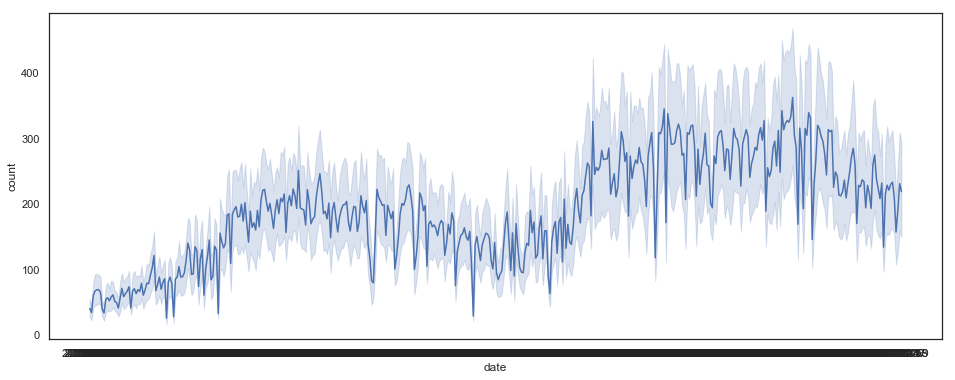

In [11]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['date'], y=df['count'],
             data=df)

In [12]:
def SplitMonth(df):
    df['month'] = df['date'].apply(lambda x: x.split('-')[1])
    return

In [13]:
SplitMonth(df)

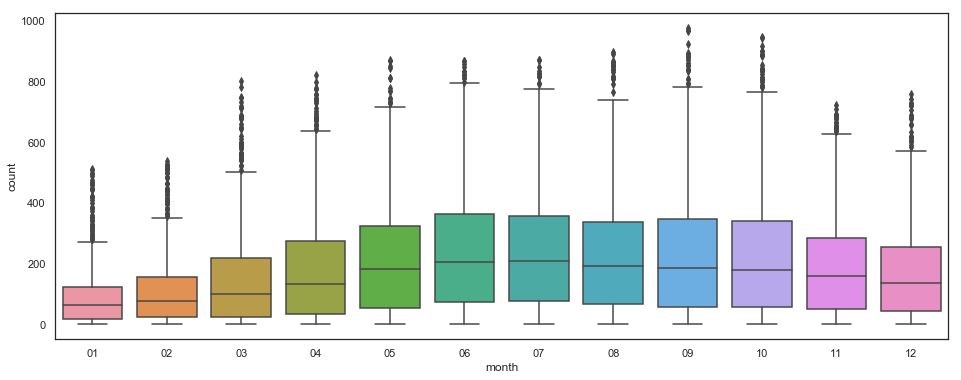

In [14]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month'], y=df['count'],
             data=df)

In [15]:
#a lot of outliers each month

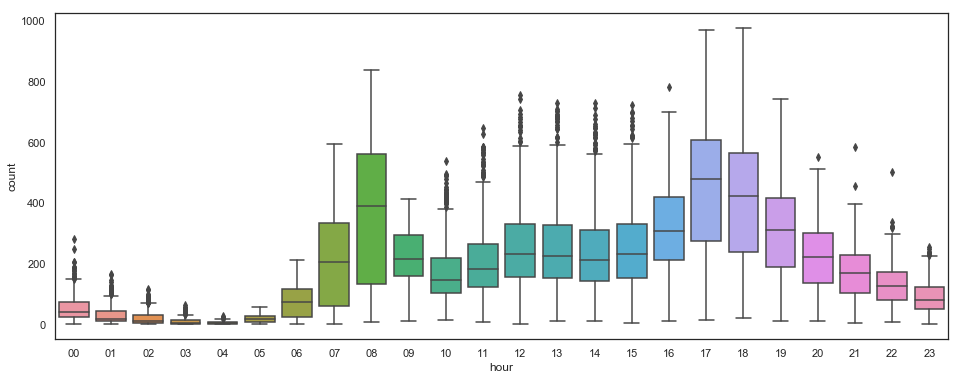

In [16]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['hour'], y=df['count'],
             data=df)

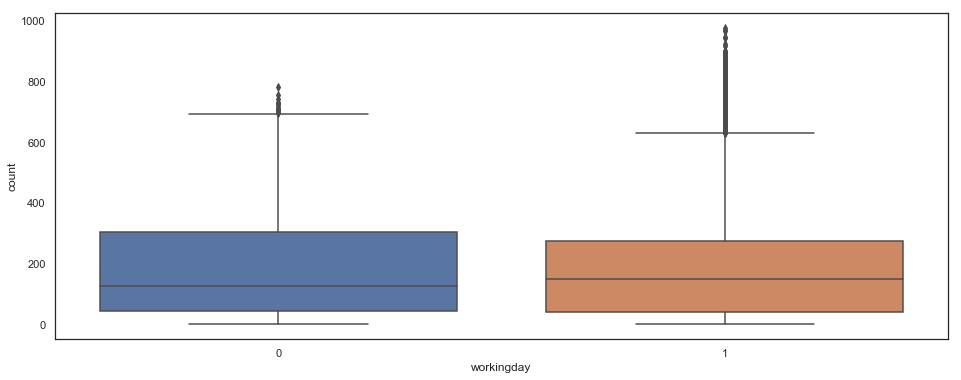

In [17]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['workingday'], y=df['count'],
             data=df)

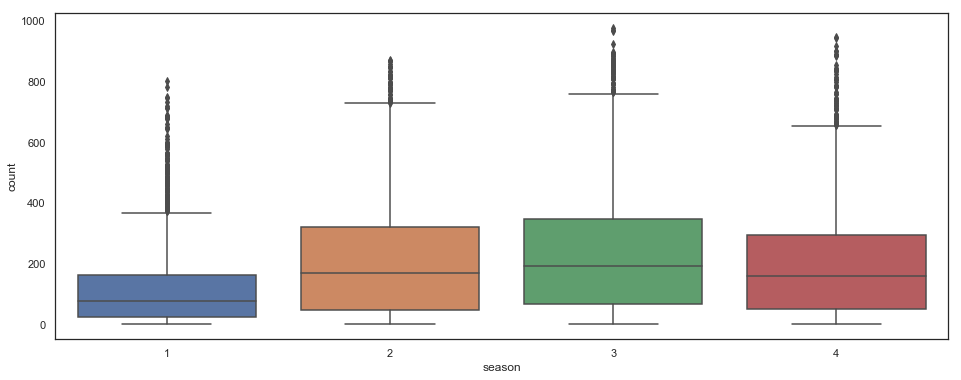

In [18]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['season'], y=df['count'],
             data=df)

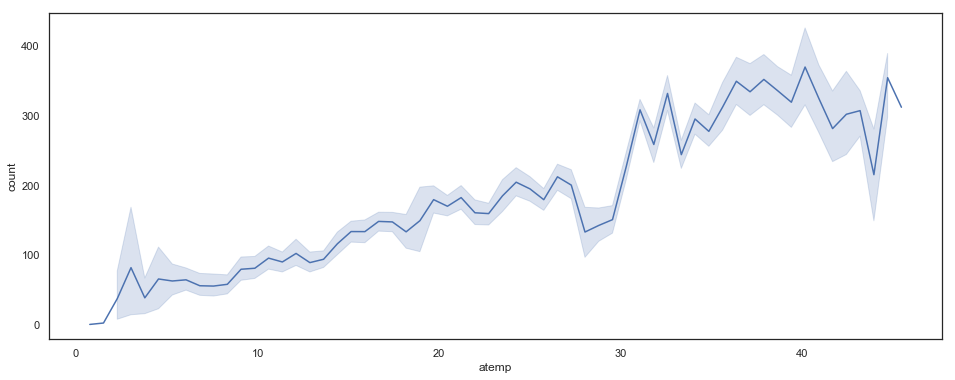

In [19]:
plt.figure(figsize=(16, 6))

sns.lineplot(x=df['atemp'], y=df['count'],
             data=df)

In [20]:
variablelist = ["hour", "month", "season", "weather", "holiday", "workingday"]
for var in variablelist:
    df[var] = df[var].astype("category")

In [21]:
df.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
month         category
dtype: object

In [22]:
#df.drop(['registered'], axis=1)
#df.drop(['casual'], axis=1)

df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,01
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,01
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,01
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,01


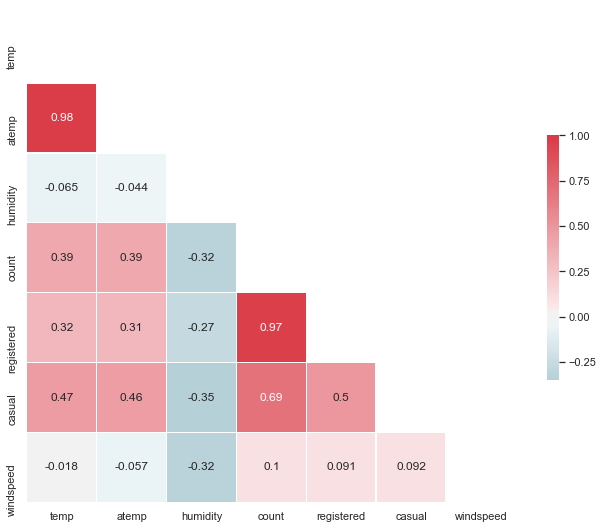

In [23]:
sns.set(style="white")
corr = df[["temp", "atemp", "season", "workingday", "humidity", "count", "registered", "casual", "windspeed"]].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [24]:
#Average users by time of day

In [25]:
#average users by time of day by type of user, casual vs registered

In [26]:
#average users by time of day, working day vs non

In [27]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [28]:
data = train.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [29]:
def FeatureEngineering(df):
    df['date'] = df['datetime'].apply(lambda x: x.split()[0])
    df['hour'] = df['datetime'].apply(lambda x: x.split()[1]).apply(lambda x: x.split(':')[0])
    df['month'] = df['date'].apply(lambda x: x.split('-')[1])
    df.drop(columns='datetime', inplace=True)
    df.drop(columns='date', inplace=True)
    variablelist = ["hour", "month", "season", "weather", "holiday", "workingday"]
    for var in variablelist:
        df[var] = df[var].astype("category")
    return

In [ ]:
FeatureEngineering(data)
FeatureEngineering(train)
FeatureEngineering(test)

In [ ]:
train.head()

In [ ]:
X = train
y = train['count']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [ ]:
#yLabels = train["count"]
#yLabelsRegistered = train["registered"]
#yLabelsCasual = train["casual"]

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = Ridge(alpha=400).fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
m = LinearRegression()

ytest = np.log1p(yLabels)
m.fit(X = train, y = ytest)

pred = m.predict(X=train)

print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(ytest),np.exp(pred),False))

In [ ]:
ridge_m = Ridge()
ridge_params = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m,
                          ridge_params,
                          scoring = rmsle_scorer,
                          cv=5)
grid_ridge_m.fit(train, ytest )
preds = grid_ridge_m.predict(X= train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(ytest),np.exp(preds),False))

In [ ]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
grid_lasso_m.fit(train, ytest)
preds = grid_lasso_m.predict(X=train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(ytest),np.exp(preds),False))